In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load dataset
df = pd.read_csv("/kaggle/input/ev-market/ElectricCarData_Clean.csv")

In [3]:
cols_to_use = ['Range_Km', 'Efficiency_WhKm', 'PriceINR', 'AccelSec', 'TopSpeed_KmH']
df[cols_to_use] = df[cols_to_use].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=cols_to_use).copy()

# Step 4: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[cols_to_use])

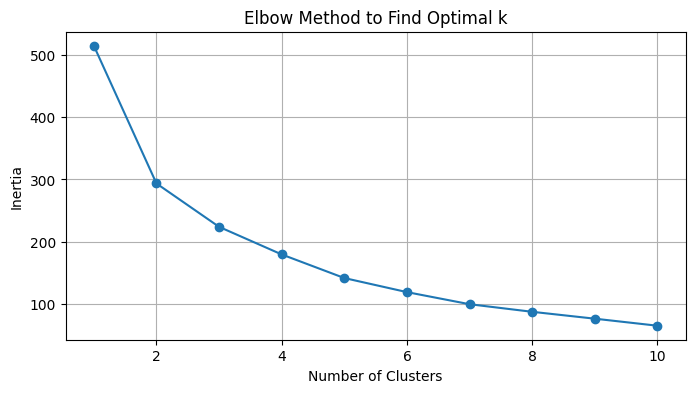

In [4]:
# Step 5: Elbow method to determine optimal clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [5]:
# Step 6: Apply KMeans with optimal k (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['SegmentCluster'] = kmeans.fit_predict(scaled_features)

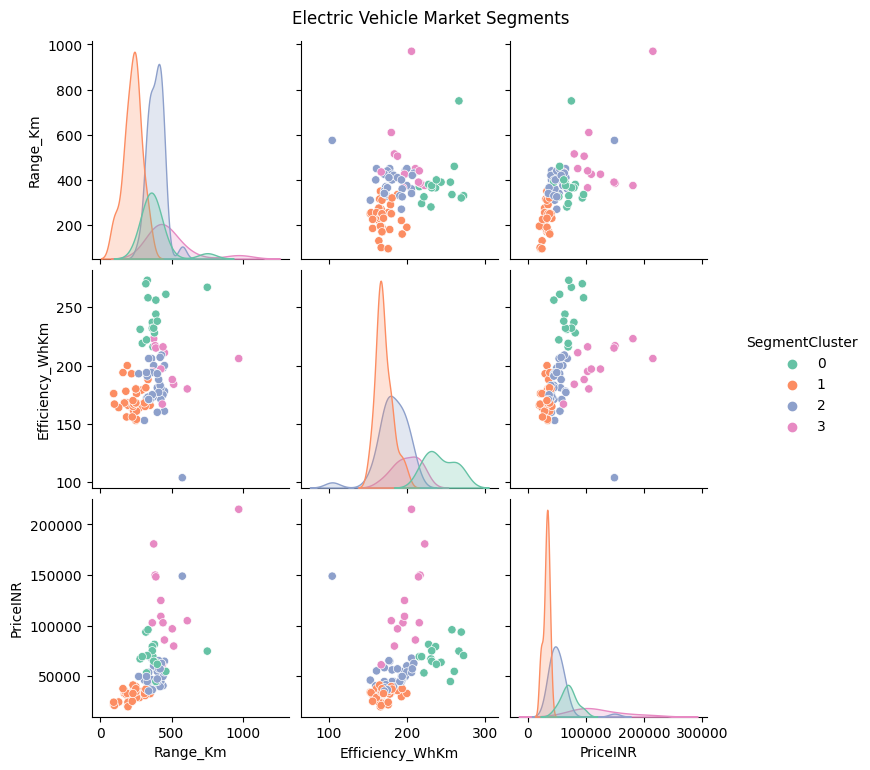

In [6]:
# Step 7: Visualize clusters
sns.pairplot(df_clean, vars=['Range_Km', 'Efficiency_WhKm', 'PriceINR'], hue='SegmentCluster', palette='Set2')
plt.suptitle("Electric Vehicle Market Segments", y=1.02)
plt.show()

In [7]:
# Step 8: Cluster profiling
cluster_summary = df_clean.groupby('SegmentCluster')[cols_to_use].mean().round(2)
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                Range_Km  Efficiency_WhKm   PriceINR  AccelSec  TopSpeed_KmH
SegmentCluster                                                              
0                 383.12           242.75   70175.56      5.91        191.88
1                 226.92           170.54   31769.38     10.07        145.49
2                 389.29           181.51   52085.91      6.61        179.17
3                 483.85           199.69  120289.92      3.31        264.77
